# Машинное обучение, ФКН ВШЭ

## Практическое задание 5

### Общая информация
Дата выдачи: 08.11.2018

Мягкий дедлайн: 7:59MSK 18.11.2018

Жесткий дедлайн: 23:59MSK 19.11.2018

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-Username.ipynb
* Модуль hw5code.py
* Ссылка на посылку в Яндекс.Контесте:

В контест https://contest.yandex.ru/contest/9963/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,LabelBinarizer
from sklearn.base import BaseEstimator
import seaborn as sns
from collections import Counter
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

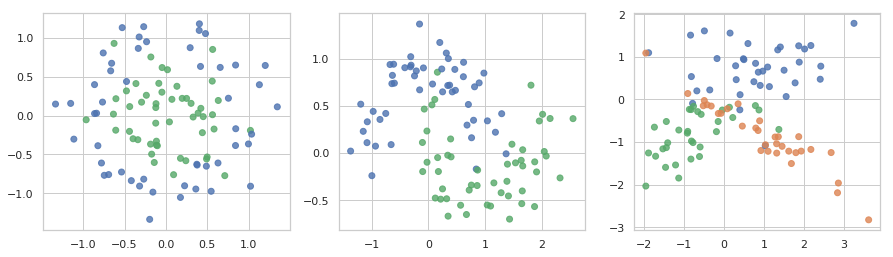

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

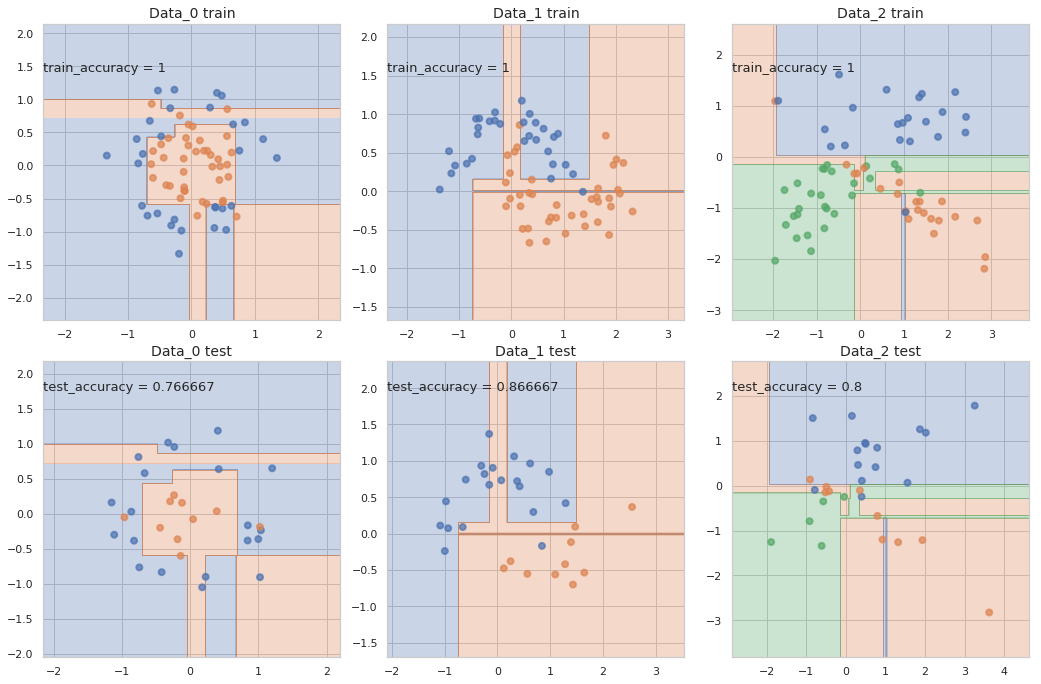

In [6]:
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
plt.figure(figsize=(15, 10))

for it in [0,1,2]:
    X, y = datasets[it]
    X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7, random_state = 42)
    lr  = DecisionTreeClassifier().fit(X_train, y_train)
    this_plot = plt.subplot(2,3,it+1)
    plot_surface(lr, X_train, y_train)
    plt.title('Data_%i' %it + ' train', fontsize = 14)
    plt.text(0,0.84,'train_accuracy = %g'%accuracy_score(lr.predict(X_train), y_train) ,transform = this_plot.transAxes, fontsize = 13)
    
    this_plot = plt.subplot(2,3,it+4)
    plot_surface(lr, X_test, y_test)
    plt.title('Data_%i' %it + ' test', fontsize = 14)
    plt.text(0,0.9,'test_accuracy = %g'%accuracy_score(lr.predict(X_test), y_test) ,transform = this_plot.transAxes, fontsize = 13)
    

__Ответ:__

__2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

In [7]:
def tree_trainer(X,y, depth, samples, draw = True):
    X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7, random_state = 24)
    if draw:
        fig = plt.figure(figsize = (3*samples.shape[0],3*depth.shape[0]))
    test_accuracy = []
    train_accuracy = []
    plot_counter = 0
    for i in np.arange(0,depth.shape[0]):
        for j in np.arange(0, samples.shape[0]):
            tree = DecisionTreeClassifier(max_depth=depth[i], min_samples_leaf=samples[j]).fit(X_train, y_train)
            test_accuracy.append(accuracy_score(tree.predict(X_test), y_test))
            train_accuracy.append(accuracy_score(tree.predict(X_train), y_train))
            
            if draw:
                plot_counter +=1
                plt.subplot(depth.shape[0],samples.shape[0],plot_counter)
                plot_surface(tree, X_train, y_train)
                plt.title('max_depth=%i' %depth[i] + ' min_samles=%i' % samples[j])
            
    return train_accuracy, test_accuracy

In [8]:
depth = np.arange(1,50,5)
samples = np.arange(1,16,4)
X, y = datasets[1]
train_accuracy, test_accuracy = tree_trainer(X,y, depth, samples, draw = False)

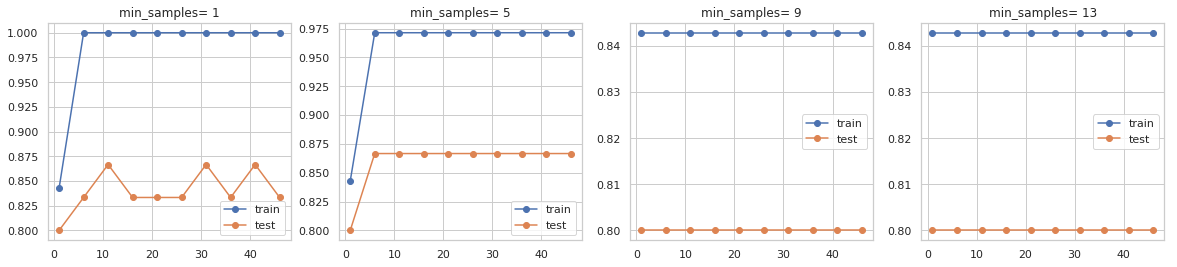

In [9]:
plt.figure(figsize = (5*samples.shape[0],4))
train_accuracy = np.array(train_accuracy).reshape(-1,samples.shape[0])
test_accuracy = np.array(test_accuracy).reshape(-1,samples.shape[0])
for i in np.arange(0, samples.shape[0]):
    plt.subplot(1,samples.shape[0],i+1)
    plt.plot(depth,train_accuracy[:,i],label = 'train', marker = 'o')
    plt.plot(depth,test_accuracy[:,i], label = 'test', marker = 'o')
    plt.title('min_samples= %i' % samples[i])
    plt.legend()

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

__4. (0.5 балла)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [10]:
def find_best_split(feature_vector, target_vector):
    """
    Под критерием Джини здесь подразумевается следующая функция:
    $$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$,
    $R$ — множество объектов, $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,
     $H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.

    Указания:
    * Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
    * В качестве порогов, нужно брать среднее двух сосдених (при сортировке) значений признака
    * Поведение функции в случае константного признака может быть любым.
    * При одинаковых приростах Джини нужно выбирать минимальный сплит.
    * За наличие в функции циклов балл будет снижен. Векторизуйте! :)

    :param feature_vector: вещественнозначный вектор значений признака
    :param target_vector: вектор классов объектов,  len(feature_vector) == len(target_vector)

    :return thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно
     разделить на две различные подвыборки, или поддерева
    :return ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds len(ginis) == len(thresholds)
    :return threshold_best: оптимальный порог (число)
    :return gini_best: оптимальное значение критерия Джини (число)
    """
    
    x = np.unique(feature_vector)
    averages = (x[1:] + x[:-1])/2
    gini_vec = [] 
    splits = []
    if averages.shape[0] == 0:
        return None,None,x, -1
        
        
    for it in np.arange(0,averages.shape[0]):
        nr_l = (averages[it] < feature_vector).mean()
        nr_r = (averages[it] > feature_vector).mean()
        targets_l = target_vector[np.where(averages[it] < feature_vector)]
        targets_r = target_vector[np.where(averages[it] > feature_vector)]
        l_p1 = targets_l.mean()
        l_p0 = 1 - l_p1
        r_p1 = targets_r.mean()
        r_p0 = 1 - r_p1
        gini_vec.append(-nr_r*(1 - r_p0**2 - r_p1**2) - nr_l*(1- l_p0**2 - l_p1**2))
        splits.append((targets_l.shape[0]/feature_vector.shape[0]) * (targets_r.shape[0]/feature_vector.shape[0]))
    splits = np.array(splits)
    gini_vec = np.array(gini_vec)
    best_gini = gini_vec[np.where(splits == np.min(splits[np.where(gini_vec == np.max(gini_vec))]))][0]
    best_average = averages[np.where(splits == np.min(splits[np.where(gini_vec == np.max(gini_vec))]))][0]
    return averages, gini_vec, best_average, best_gini

  $$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$,
    $R$ — множество объектов, $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,
     $H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.


__5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**

__6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

In [11]:
class DecisionTree:
      
    def __init__(self, feature_types, max_depth=None, min_samples_split=1, min_samples_leaf=1):
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf
        self._depth = None

    def _fit_node(self, sub_X, sub_y, node):
        
        sub_X = np.array(sub_X)
        sub_y = np.array(sub_y)
        if np.all(sub_y == sub_y[0]):
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return
        elif sub_X.shape[0] < self._min_samples_leaf:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return
        elif  self._max_depth != None and self._depth > self._max_depth:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return
        self._depth +=1
        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(1, sub_X.shape[1]):
            feature_type = self._feature_types[feature]
            categories_map = {}

            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])
                ratio = {}
                for key, current_count in counts.items():
                    if key in clicks:
                        current_click = clicks[key]
                    else:
                        current_click = 0
                    ratio[key] = current_click / current_count
                sorted_categories = list(map(lambda x: x[1], sorted(ratio.items(), key=lambda x: x[1])))
                categories_map = dict(zip(list(np.unique(sub_X[:, feature])),sorted_categories))
                feature_vector = np.array(list(map(lambda x: categories_map[x], sub_X[:, feature])))
                
            else:
                raise ValueError

            if len(feature_vector) < 3: #min num of features
                continue
            _, _, threshold, gini = find_best_split(feature_vector, sub_y)
            if gini_best is None or gini > gini_best:
                feature_best = feature
                gini_best = gini
                split = feature_vector <= threshold

                if feature_type == "real":
                    threshold_best = threshold
                elif feature_type == "categorical":
                    threshold_best = list(map(lambda x: x[0],
                                              filter(lambda x: x[1] < threshold, categories_map.items())))
                else:
                    raise ValueError

        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return
        
        if sub_y[split].shape[0] < self._min_samples_split or sub_y[np.logical_not(split)].shape[0] < self._min_samples_split:
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return            
        
        node["type"] = "nonterminal"
        node["class"] = Counter(sub_y).most_common(1)
        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best
        else:
            raise ValueError
            
        
        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[split], sub_y[split], node["left_child"])
        self._fit_node(sub_X[np.logical_not(split)], sub_y[np.logical_not(split)], node["right_child"])
        

    def _predict_node(self, x, node):
        if node['type'] == 'terminal' :
            return node['class']
        if self._feature_types[node['feature_split']] == 'real':
            if x[node['feature_split']]> node['threshold']:
                return self._predict_node(x, node['right_child'])
            else:
                return self._predict_node(x, node['left_child'])
        else:
            if np.any(x[node['feature_split']] == node['categories_split']):
                return self._predict_node(x, node['left_child'])
                
            else:
                return self._predict_node(x, node['right_child'])
            pass

    def fit(self, X, y):
        self._depth = 0
        self._fit_node(X, y, self._tree)
        return self
    
    def predict(self, X):
        predicted = []
        X = np.array(X)
        for index in np.arange(0,X.shape[0]):
            predicted.append(self._predict_node(X[index,:], self._tree))
        return np.array(predicted)
    def score(self,X, y):
        return accuracy_score(self.predict(X),y)

In [12]:
data = pd.read_csv('data.csv')
for feature in data.columns:
    data[feature] = LabelEncoder().fit_transform(data[feature].astype(str))
target = data['target']
data.pop('target')
data.head()
X_train,X_test,y_train,y_test = train_test_split(data, target, test_size = 0.3)
DecTree = DecisionTree(feature_types= np.full(data.shape[1], 'categorical')).fit(X_train, y_train)
accuracy_score(DecTree.predict(X_test),y_test)

1.0

In [13]:
accuracy_score(DecTree.predict(data),target)

1.0

__7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

__14. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

In [14]:
data = pd.read_csv('tic-tac-toe.data.csv',header = None)
for feature in data.columns:
    data[feature] = LabelEncoder().fit_transform(data[feature].astype(str))
target = data[9]
data.pop(9)
X_train,X_test,y_train,y_test = train_test_split(data, target, test_size = 0.3)

In [15]:
%%time
depths =[1, 4, 8, 32]
leaf = np.arange(0,20)
split =np.arange(0,15,1)
depth_accuracy = []
leaf_accuracy = []
split_accuracy = []
for argument in depths:
    ds =DecisionTree(feature_types= np.full(data.shape[1], 'categorical'),
                     max_depth= argument).fit(X_train, y_train)
    depth_accuracy.append(ds.score(X_test,y_test))

for argument in leaf:
    ds =DecisionTree(feature_types= np.full(data.shape[1], 'categorical'),
                     min_samples_leaf= argument).fit(X_train, y_train)
    leaf_accuracy.append(ds.score(X_test,y_test))

for argument in split:
    ds =DecisionTree(feature_types= np.full(data.shape[1], 'categorical'),
                     min_samples_split= argument).fit(X_train, y_train)
    split_accuracy.append(ds.score(X_test,y_test))


CPU times: user 11.9 s, sys: 0 ns, total: 11.9 s
Wall time: 11.9 s


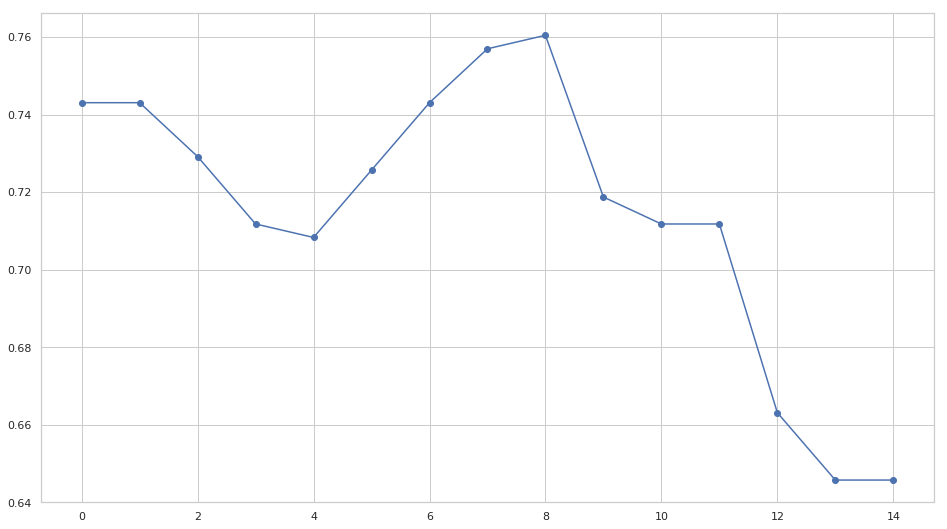

In [16]:
plt.figure(figsize=(16,9))
plt.plot(split, split_accuracy,'-o')

__15. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
cross_val_score?

In [17]:
data = pd.read_csv('car.data.csv',header = None)

data[6][data[6] == 'acc'] = 0
data[6][data[6] == 'unacc'] = 0
data[6][data[6] == 'good'] = 1
data[6][data[6] == 'vgood'] = 1
target = data[6]
data.pop(6)
for feature in data.columns:
    data[feature] = LabelEncoder().fit_transform(data[feature].astype(str))
data.head()
X_train,X_test,y_train,y_test = train_test_split(data, target, test_size = 0.3)
DecTree = DecisionTree(feature_types= np.full(data.shape[1], 'categorical')).fit(X_train, y_train)
np.mean(DecTree.predict(X_test) == y_test)

0.861271676300578

In [68]:
data = pd.read_csv('nursery.data.csv',header = None)
data[8][data[8] == 'recommend'] = 0
data[8][data[8] == 'not_recom'] = 0
data[8][data[8] != 'recommend'] = 1
data[8][data[8] != 'not_recom'] = 1
target = data[8]
data.pop(8)
for feature in data.columns:
    data[feature] = LabelEncoder().fit_transform(data[feature].astype(str))
X_train,X_test,y_train,y_test = train_test_split(data, target, test_size = 0.3)
DecTree = DecisionTree(feature_types= np.full(data.shape[1], 'categorical')).fit(X_train, y_train)
accuracy_score(y_test.astype(int),np.array(DecTree.predict(X_test)))

1.0

__16. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**